In [1]:
import sys,os
import pandas as pd 	#for CSV or large data files
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt, seaborn as sns	#for ploting or visual representation of data
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import (mean_squared_error,r2_score,mean_absolute_percentage_error)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor

<h3 style="color:orange">Load Data</h3>

In [2]:
data=pd.read_csv("./bike+sharing+dataset/hour.csv")

data=data.drop(["instant","dteday","casual","registered"],axis=1)
print(data.shape)
data

(17379, 13)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [3]:
print(f"has duplicated: {data.duplicated().sum()}")
print(f"has null: {data.isna().sum()}")

# remove duplicates
data.drop_duplicates(inplace=True)
print(f"\nhas duplicated: {data.duplicated().sum()}")

data.describe()

has duplicated: 2
has null: season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

has duplicated: 0


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<h3 style="color:orange">Categorical encoding</h3>

In [4]:
# season
enc=OneHotEncoder(drop="first",sparse_output=False)
season_df=enc.fit_transform(data[["season"]]).astype(int)
season_df=pd.DataFrame(season_df,columns=[f"season_{i+1}" for i in range(season_df.shape[1])])
# print(season_df.value_counts())

# month
enc=OneHotEncoder(drop="first",sparse_output=False)
mnth_df=enc.fit_transform(data[["mnth"]]).astype(int)
mnth_df=pd.DataFrame(mnth_df,columns=[f"mnth_{i+1}" for i in range(mnth_df.shape[1])])
# print(mnth_df.value_counts())

# hr
enc=OneHotEncoder(drop="first",sparse_output=False)
hr_df=enc.fit_transform(data[["hr"]]).astype(int)
hr_df=pd.DataFrame(hr_df,columns=[f"hr_{i+1}" for i in range(hr_df.shape[1])])
# print(hr_df.value_counts())

# weekday
enc=OneHotEncoder(drop="first",sparse_output=False)
weekday_df=enc.fit_transform(data[["weekday"]]).astype(int)
weekday_df=pd.DataFrame(weekday_df,columns=[f"weekday_{i+1}" for i in range(weekday_df.shape[1])])
# print(weekday_df.value_counts())

# weathersit
enc=OneHotEncoder(drop="first",sparse_output=False)
weathersit_df=enc.fit_transform(data[["weathersit"]]).astype(int)
weathersit_df=pd.DataFrame(weathersit_df,columns=[f"weathersit_{i+1}" for i in range(weathersit_df.shape[1])])
# print(weathersit_df.value_counts())

<h5 style="color:cyan">Merge encoded data</h5>

In [5]:
data=pd.concat([season_df.reset_index(drop=True),
              data[["yr"]].reset_index(drop=True),
              mnth_df.reset_index(drop=True),
              hr_df.reset_index(drop=True),
              data[["holiday"]].reset_index(drop=True),
              weekday_df.reset_index(drop=True),
              data[["workingday"]].reset_index(drop=True),
              weathersit_df.reset_index(drop=True),
              data[["temp","atemp","hum","windspeed","cnt"]].reset_index(drop=True)],axis=1)

data

,season_1,season_2,season_3,yr,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weekday_6,workingday,weathersit_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.24,0.2879,0.81,0.0000,16
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.22,0.2727,0.80,0.0000,40
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.22,0.2727,0.80,0.0000,32
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.24,0.2879,0.75,0.0000,13
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0.26,0.2576,0.60,0.1642,119
17373,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0.26,0.2576,0.60,0.1642,89
17374,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0.26,0.2576,0.60,0.1642,90
17375,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0.26,0.2727,0.56,0.1343,61


<h3 style="color:orange">Split data</h3>

In [6]:
x=data.drop(["cnt"],axis=1)
y=data["cnt"]

# Standardize data
st=StandardScaler()
x_scale=st.fit_transform(x)

<h3 style="color:orange">train test split</h3>

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
x_scale_train,x_scale_test,y_train,y_test=train_test_split(x_scale,y,train_size=0.7,random_state=42)       # for Linear regressor

print(f"x train: {x_train.shape}, y train: {y_train.shape}\nx test: {x_test.shape}, y test: {y_test.shape}\n")

x train: (12163, 53), y train: (12163,)
x test: (5214, 53), y test: (5214,)



<h3 style="color:orange">BAseline model</h3>

In [8]:
model_scores=dict()

<h5 style="color:cyan">Decision Tree</h5>

DecisionTree Regressor Accuracy: 0.5329014164700061
MSE: 14362.281814906619
RMSE: 119.84273784800904
R²: 0.5329014164700061
MAPE: 4.412802709047147


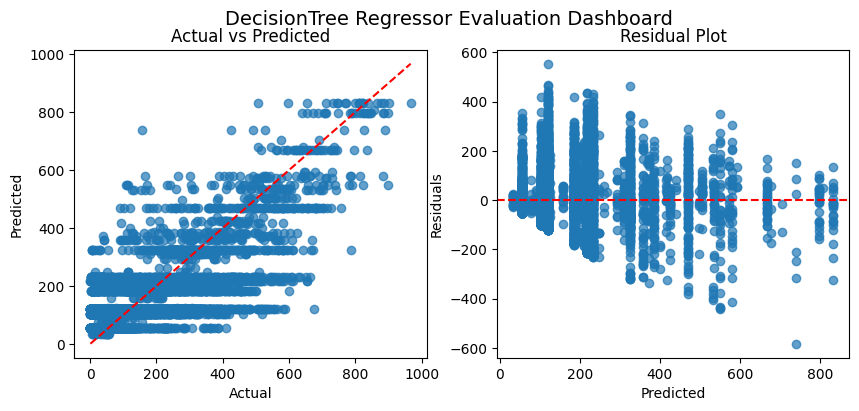

In [9]:
model=DecisionTreeRegressor(max_depth=6,random_state=42)
model_name="DecisionTree Regressor"
model_scores[model_name]=dict()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mMSE: \u001b[0m{mean_squared_error(y_test,y_pred)}")
print(f"\u001b[33mRMSE: \u001b[0m{mean_squared_error(y_test,y_pred)**0.5}")
print(f"\u001b[33mR²: \u001b[0m{r2_score(y_test,y_pred)}")
print(f"\u001b[33mMAPE: \u001b[0m{mean_absolute_percentage_error(y_test,y_pred)}")

residuals = y_test - y_pred

model_scores[model_name]["RMSE"]=mean_squared_error(y_test,y_pred)**0.5
model_scores[model_name]["R^2"]=r2_score(y_test,y_pred)
model_scores[model_name]["MAPE"]=mean_absolute_percentage_error(y_test,y_pred)

fig, axes = plt.subplots(1,2, figsize=(10,4))
fig.suptitle(f"{model_name} Evaluation Dashboard", fontsize=14)

# Scatter: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Residual Plot
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_title("Residual Plot")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")

plt.subplots_adjust(hspace=0.6)

<h5 style="color:cyan">Linear Regerssion</h5>

c:\Users\shash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Linear Regressor Accuracy: 0.05842119137356083
MSE: 10003.801570823915
RMSE: 100.01900604797028
R²: 0.6746504765839425
MAPE: 2.940721440800716


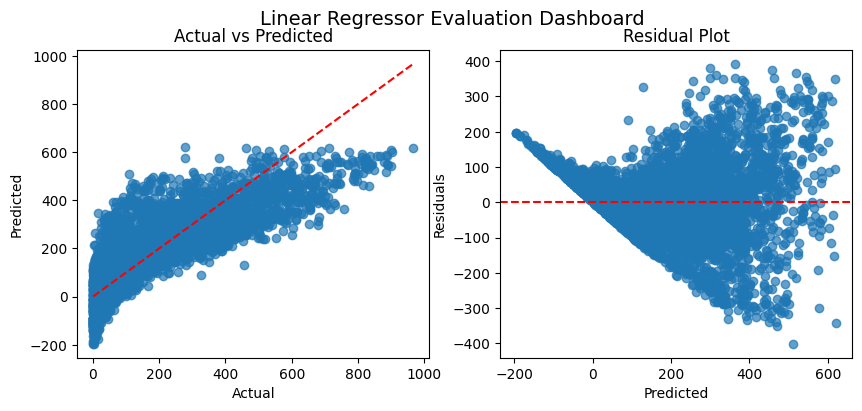

In [10]:
model=LinearRegression()
model_name="Linear Regressor"
model_scores[model_name]=dict()

model.fit(x_scale_train,y_train)
y_pred=model.predict(x_scale_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mMSE: \u001b[0m{mean_squared_error(y_test,y_pred)}")
print(f"\u001b[33mRMSE: \u001b[0m{mean_squared_error(y_test,y_pred)**0.5}")
print(f"\u001b[33mR²: \u001b[0m{r2_score(y_test,y_pred)}")
print(f"\u001b[33mMAPE: \u001b[0m{mean_absolute_percentage_error(y_test,y_pred)}")

residuals = y_test - y_pred

model_scores[model_name]["RMSE"]=mean_squared_error(y_test,y_pred)**0.5
model_scores[model_name]["R^2"]=r2_score(y_test,y_pred)
model_scores[model_name]["MAPE"]=mean_absolute_percentage_error(y_test,y_pred)

fig, axes = plt.subplots(1,2, figsize=(10,4))
fig.suptitle(f"{model_name} Evaluation Dashboard", fontsize=14)

# Scatter: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Residual Plot
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_title("Residual Plot")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")

plt.subplots_adjust(hspace=0.6)

<h5 style="color:cyan">Results — Baseline models</h5>

Two single regressors were trained to establish baseline performance:
1. **Decision Tree Regressor (max_depth=6)**: RMSE (test set): 119.84273784800904
2. **Linear Regression (with StandardScaler)**: RMSE (test set): 100.01900604797028

The better model (lower **RMSE**) serves as the **Linear Regression** for comparison with ensemble methods.

Text(0.5, 1.0, 'RMSE of baseline model')

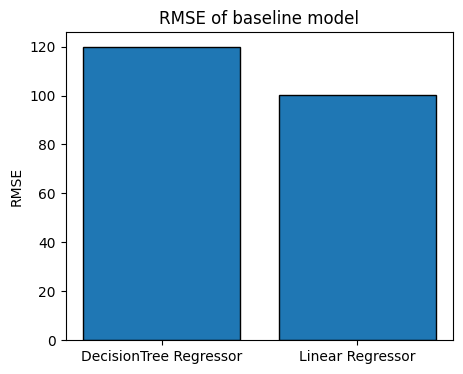

In [11]:
RMSE_score=np.array([v["RMSE"] for v in model_scores.values()])
plt.figure(figsize=(5,4))
plt.bar(range(len(RMSE_score)),RMSE_score, edgecolor='black')
_=plt.xticks(range(len(model_scores)), model_scores.keys(), fontsize=10)
plt.ylabel("RMSE")
plt.title("RMSE of baseline model")

<h3 style="color:orange">Bagging (Bootstrap Aggregating)</h3>

**Bagging** is an ensemble technique designed primarily to **reduce model variance** and improve stability of high-variance learners such as Decision Trees or Linear regressors.

The core idea is :
-  Train multiple models on different random subsets (bootstrapped samples) of the training data  
-  and **average** their predictions to reduce random fluctuations.

###  Step-by-Step Intuition
1. From the original dataset of size `N`, sample (with replacement) `N` observations → this forms one **bootstrap sample**.  
2. Train a base model  $f_b(x)$ (e.g., a DecisionTree regressor) on each bootstrap sample.  
3. Repeat this process $B$ times, creating $B$ different models.  
4. Combine their predictions:
   - **Regression:** average them  
     $$\hat{f}_{\text{bag}}(x) = \frac{1}{B} \sum_{b=1}^{B} f_b(x)$$
   - **Classification:** take majority vote.

Each $f_b(x)$ is slightly different because each model sees a slightly different dataset due to resampling.  
Averaging smooths out the noise of individual models.

Suppose each individual model has:
- Bias = $\text{Bias}[f_b(x)]$
- Variance = $\text{Var}[f_b(x)] $

Then the expected mean squared error (MSE) of a single model is:
$$\text{MSE}[f_b(x)] = \text{Bias}^2 + \text{Var} + \sigma^2_{\text{noise}}$$

For the **bagged ensemble**, since predictions are averaged:
$$\text{Var}\big[\hat{f}_{\text{bag}}(x)\big]
= \rho\,\text{Var}[f_b(x)] + \frac{(1-\rho)\,\text{Var}[f_b(x)]}{B}
$$

where $\rho$ is the correlation between individual model predictions.
- As  $B \to \infty$, the second term approaches 0.  
- If models are **uncorrelated** ($\rho$ small), variance reduction is large.  
- Therefore, bagging reduces variance substantially **when base learners are unstable and decorrelated**.

#### $\textcolor{lightblue}{\text{Bias–Variance Perspective}}$

| Model | Effect on Bias | Effect on Variance | Learning Pattern |
|--------|----------------|--------------------|------------------|
| **Decision Tree (Baseline)** | Low Bias | **High Variance** | Fits complex non-linear data, but overfits |
| **Bagging (Decision Trees)** | Similar Bias | **Reduced Variance** | Averages multiple trees trained on bootstrap samples; stabilizes predictions |
| **Linear Regression (Baseline)** | **High Bias** | Low Variance | Assumes linear patterns; underfits non-linear data |


#### $\textcolor{lightgreen}{\text{Key Insight}}$

Bagging transforms a set of **unstable** models into a **stable and reliable** predictor.  
In practice, this often translates to lower test RMSE compared to a single Decision Tree baseline, confirming the theory of **variance reduction** through averaging.

In our case, Bagging lowered the RMSE compared to a single Decision Tree, demonstrating effective **variance reduction**.

- Each Decision Tree has high variance because it reacts strongly to small data changes.
- Bagging trains many trees on different random subsets (bootstrap samples).
- Averaging their predictions cancels out noise and stabilizes predictions.
- The result: lower test RMSE and smoother prediction curves.


In this case, the **Bagging Regressor** (using Decision Trees) performed slightly worse than the **Linear Regression baseline** because the dataset’s underlying relationships are mostly **linear and smooth**. Linear Regression efficiently captures these patterns with low bias, while Bagging adds unnecessary non-linear complexity. Since Bagging primarily reduces variance, it offers little benefit when variance is not the dominant source of error. As a result, the ensemble’s averaging did not meaningfully improve generalization and occasionally smoothed out genuine linear trends, leading to a marginally higher RMSE compared to the simpler Linear Regression model.

Bagging (DecisionTree) Accuracy: 0.5734640641667114
MSE: 13115.067205570418
RMSE: 114.52103390019852
R²: 0.5734640641667114
MAPE: 4.365000022277602


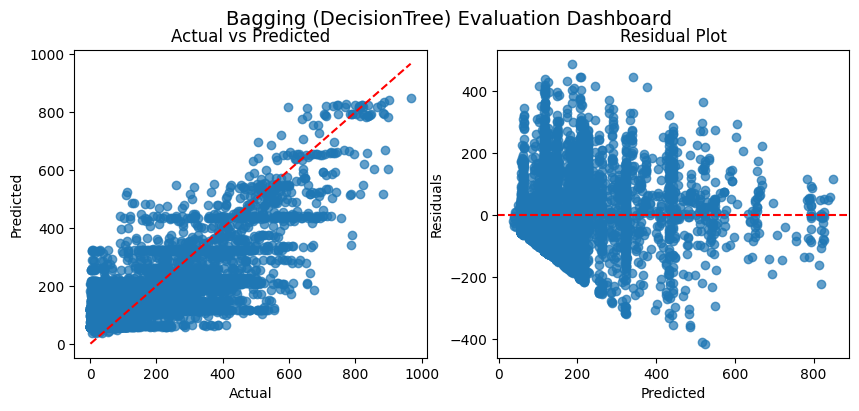

In [12]:
base_model=DecisionTreeRegressor(max_depth=6,random_state=42)
model=BaggingRegressor(base_model,n_estimators=50,random_state=42,bootstrap=True)
model_name="Bagging (DecisionTree)"
model_scores[model_name]=dict()

model.fit(x_scale_train,y_train)
y_pred=model.predict(x_scale_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_scale_test,y_test)}")
print(f"\u001b[33mMSE: \u001b[0m{mean_squared_error(y_test,y_pred)}")
print(f"\u001b[33mRMSE: \u001b[0m{mean_squared_error(y_test,y_pred)**0.5}")
print(f"\u001b[33mR²: \u001b[0m{r2_score(y_test,y_pred)}")
print(f"\u001b[33mMAPE: \u001b[0m{mean_absolute_percentage_error(y_test,y_pred)}")

residuals = y_test - y_pred

model_scores[model_name]["RMSE"]=mean_squared_error(y_test,y_pred)**0.5
model_scores[model_name]["R^2"]=r2_score(y_test,y_pred)
model_scores[model_name]["MAPE"]=mean_absolute_percentage_error(y_test,y_pred)

fig, axes = plt.subplots(1,2, figsize=(10,4))
fig.suptitle(f"{model_name} Evaluation Dashboard", fontsize=14)

# Scatter: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Residual Plot
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_title("Residual Plot")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")

plt.subplots_adjust(hspace=0.6)

<h3 style="color:orange">Boosting (Bias Reduction)</h3>

**Gradient Boosting** is an ensemble learning technique that primarily targets **bias reduction** by combining many *weak learners* (in this case, **Linear Regressors**) **sequentially**.  
Each new model is trained to correct the **errors (residuals)** made by the ensemble so far.

In contrast to Bagging (which trains models independently and averages them), **Boosting** trains models *additively* each model learns from the mistakes of its predecessors.


### Step-by-Step Intuition

1. Start with a simple model $ f_0(x) $, often a constant (e.g., the mean of the target).  
2. Compute residuals — the difference between true and predicted values:
   $$
   r_i^{(m)} = y_i - f_{m-1}(x_i)
   $$
3. Train a weak learner $ h_m(x) $ (here, a **Linear Regressor**) to predict these residuals.  
4. Update the model by adding a scaled version of this weak learner:
   $$
   f_m(x) = f_{m-1}(x) + \eta \cdot h_m(x)
   $$
   where $ \eta \in (0,1] $ is the **learning rate** controlling how much each learner contributes.
5. Repeat for $ M $ iterations (or learners).  
   The final boosted model is:
   $$
   \hat{f}(x) = f_0(x) + \eta \sum_{m=1}^{M} h_m(x)
   $$



Gradient Boosting can be understood as performing **gradient descent in function space** to minimize a loss function $ L(y, f(x)) $.  

At each iteration $ m $, the weak learner $ h_m(x) $ is fit to the **negative gradient** of the loss:
$$
h_m(x_i) \approx -\frac{\partial L(y_i, f_{m-1}(x_i))}{\partial f_{m-1}(x_i)}
$$
Then update:
$$
f_m(x) = f_{m-1}(x) + \eta h_m(x)
$$

Thus, each new Linear Regressor takes a small step in the direction that most reduces the loss — just like gradient descent — but instead of updating coefficients of a single model, we build new regressors iteratively to refine predictions.


#### $\textcolor{lightblue}{\text{Bias–Variance Perspective}}$

| Model | Effect on Bias | Effect on Variance | Learning Pattern |
|--------|----------------|--------------------|------------------|
| **Linear Regression (baseline)** | **High Bias** | Low Variance | Assumes linear relationships; underfits complex non-linear data |
| **Bagging (Decision Tree base)** | Similar (Low) Bias | **Reduced Variance** | Averages multiple high-variance trees trained on bootstrapped samples, stabilizing predictions and improving generalization |
| **Gradient Boosting (Decision Tree base)** | **Reduced Bias** | Moderate Variance | Sequentially fits residuals using shallow trees, progressively reducing systematic bias and capturing non-linear relationships |


#### $\textcolor{lightgreen}{\text{Key Insight}}$

Gradient Boosting improves predictive accuracy by progressively reducing bias.  
Unlike Bagging (which reduces variance through averaging), Boosting **learns what previous models got wrong** and corrects those errors iteratively leading to **lower test RMSE** and smoother generalization.

In our case, the **Gradient Boosting Regressor** achieves a lower RMSE than both the **Linear Regression** and **Bagging Regressor**, demonstrating effective **bias reduction**.

- Each Linear Regressor in boosting is a weak learner with high bias and low variance.  
- Gradient Boosting trains these weak learners **sequentially**, where each new regressor focuses on correcting the **residual errors** made by the previous ensemble.  
- This iterative learning process gradually reduces the overall bias of the model.  
- As a result, the ensemble learns more complex, non-linear relationships in the data and achieves **better predictive accuracy** and **lower test RMSE** than both the baseline and bagged models.


Gradient Boosting Regressor Accuracy: 0.8001262953341185
MSE: 6145.688672627869
RMSE: 78.39444286827906
R²: 0.8001262953341185
MAPE: 1.6556971433798426


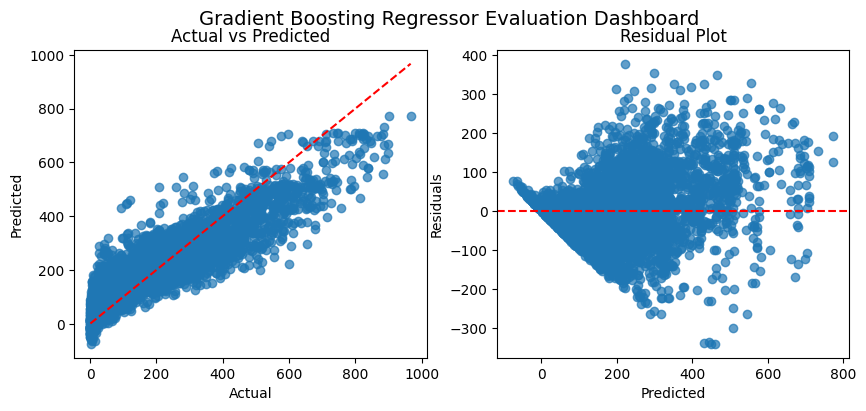

In [13]:
model=GradientBoostingRegressor(random_state=42)
model_name="Gradient Boosting Regressor"
model_scores[model_name]=dict()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mMSE: \u001b[0m{mean_squared_error(y_test,y_pred)}")
print(f"\u001b[33mRMSE: \u001b[0m{mean_squared_error(y_test,y_pred)**0.5}")
print(f"\u001b[33mR²: \u001b[0m{r2_score(y_test,y_pred)}")
print(f"\u001b[33mMAPE: \u001b[0m{mean_absolute_percentage_error(y_test,y_pred)}")

residuals = y_test - y_pred

model_scores[model_name]["RMSE"]=mean_squared_error(y_test,y_pred)**0.5
model_scores[model_name]["R^2"]=r2_score(y_test,y_pred)
model_scores[model_name]["MAPE"]=mean_absolute_percentage_error(y_test,y_pred)

fig, axes = plt.subplots(1,2, figsize=(10,4))
fig.suptitle(f"{model_name} Evaluation Dashboard", fontsize=14)

# Scatter: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Residual Plot
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_title("Residual Plot")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")

plt.subplots_adjust(hspace=0.6)

<h3 style="color:orange">Stacking</h3>

**Stacking (Stacked Generalization)** is an advanced ensemble learning method that combines the strengths of multiple diverse base models (called *Level-0 learners*) through a *Meta-Learner* (Level-1 model).  
Unlike Bagging or Boosting, which combine models using simple averaging or sequential correction, **Stacking learns an optimal way to combine model outputs**.

The key idea:
- Each base model captures different patterns in the data, and the meta-learner learns how to best blend these predictions to minimize the overall error.

### Architecture

| Level | Learners | Role |
|--------|-----------|------|
| **Level-0 (Base learners)** | K-Nearest Neighbors, Bagging Regressor, Gradient Boosting Regressor | Learn different perspectives of the data |
| **Level-1 (Meta learner)** | Ridge Regression | Learns to combine Level-0 predictions optimally |

- The base learners each make predictions on the training data.  
- These predictions are then used as new input features for the meta-learner, which learns how to weight and combine them.

Let there be $K$ base regressors:
$$\{h_1(x), h_2(x), \dots, h_K(x)\}$$

Each base learner produces a prediction:
$$z_k = h_k(x)$$

These predictions form a new feature vector:
$$\mathbf{z} = [z_1, z_2, \dots, z_K]$$

The meta-learner $g(\cdot)$ (in this case, Ridge Regression) learns to map these meta-features to the final output:
$$\hat{y} = g(\mathbf{z}) = g(h_1(x), h_2(x), \dots, h_K(x))$$

The meta-learner is trained to minimize the final prediction error (e.g., RMSE) across the validation or cross-validation folds.

#### $\textcolor{lightblue}{\text{Bias–Variance Perspective}}$

| Model | Bias | Variance | Learning Pattern |
|--------|------|-----------|----------|
| **KNN Regressor** | Low bias| high variance | Learns local patterns well |
| **Bagging Regressor** | Moderate bias| low variance | Stabilizes tree predictions |
| **Gradient Boosting Regressor** | Low bias| moderate variance | Learns complex relationships |


By combining these, Stacking achieves:
- **Lower bias** → thanks to boosting’s strong fitting capability  
- **Lower variance** → from bagging’s averaging effect  
- **Local adaptability** → captured by KNN  
The meta-learner (Ridge) balances their contributions by learning optimal weights.

#### $\textcolor{lightgreen}{\text{Key Insight}}$

Stacking combines the strengths of multiple diverse models through a meta-learning approach, leading to superior predictive accuracy.  
Unlike Bagging or Boosting, which combine models in fixed ways (averaging or sequential correction), **Stacking learns how to combine model outputs optimally** using a **meta-learner** trained on their predictions.

In our case, the **Stacking Regressor** achieves the **lowest RMSE** among all models outperforming the single Decision Tree, Bagging, and Gradient Boosting Regressors demonstrating effective **bias–variance balance** and **meta-learning optimization**.

- Each base learner contributes unique strengths:
  - **KNN Regressor** captures local patterns and non-linear relationships in feature space.
  - **Bagging Regressor** reduces variance by averaging predictions from multiple trees.
  - **Gradient Boosting Regressor** reduces bias by sequentially learning from residuals.
- The **Meta-Learner (Ridge Regression)** learns the optimal weights to combine these diverse predictions, reducing both bias and variance simultaneously.
- This hybrid learning structure allows Stacking to model complex relationships and correct systematic errors made by individual models.
- As a result, the ensemble achieves **the lowest test RMSE** and exhibits **strong generalization performance** compared to any single or simpler ensemble model.


c:\Users\shash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Stacking Regressor Accuracy: 0.7374530861933662
MSE: 2673.8998146817057
RMSE: 51.70976517720522
R²: 0.9130378562379533
MAPE: 0.6668003597487823


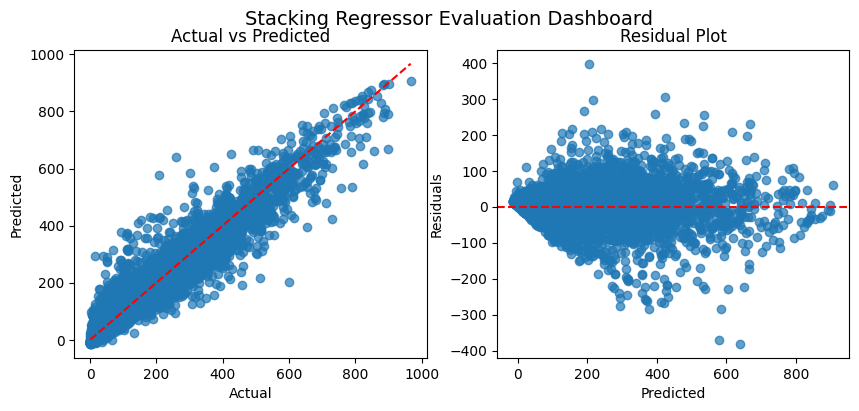

In [14]:
knn = KNeighborsRegressor(n_neighbors=5)
bag_model=BaggingRegressor(DecisionTreeRegressor(random_state=42),n_estimators=50,random_state=42,n_jobs=-1,bootstrap=True)
boost_model=GradientBoostingRegressor(random_state=42)
model_name="Stacking Regressor"
model_scores[model_name]=dict()

estimators = [('knn', knn), ('bag', bag_model), ('gbr', boost_model)]
stack = StackingRegressor(estimators=estimators, final_estimator=Ridge(), n_jobs=-1)
stack.fit(x_scale_train, y_train)
y_pred = stack.predict(x_scale_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_scale_test,y_test)}")
print(f"\u001b[33mMSE: \u001b[0m{mean_squared_error(y_test,y_pred)}")
print(f"\u001b[33mRMSE: \u001b[0m{mean_squared_error(y_test,y_pred)**0.5}")
print(f"\u001b[33mR²: \u001b[0m{r2_score(y_test,y_pred)}")
print(f"\u001b[33mMAPE: \u001b[0m{mean_absolute_percentage_error(y_test,y_pred)}")

residuals = y_test - y_pred

model_scores[model_name]["RMSE"]=mean_squared_error(y_test,y_pred)**0.5
model_scores[model_name]["R^2"]=r2_score(y_test,y_pred)
model_scores[model_name]["MAPE"]=mean_absolute_percentage_error(y_test,y_pred)

fig, axes = plt.subplots(1,2, figsize=(10,4))
fig.suptitle(f"{model_name} Evaluation Dashboard", fontsize=14)

# Scatter: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Residual Plot
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_title("Residual Plot")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")

plt.subplots_adjust(hspace=0.6)

<h3 style="color:orange">Final analysis</h3>

In [15]:
RMSE_score=np.array([v["RMSE"] for v in model_scores.values()])
R2_score=np.array([v["R^2"] for v in model_scores.values()])
MAPE_score=np.array([v["MAPE"] for v in model_scores.values()])

name=np.array(list(model_scores.keys())).reshape(-1,1)
t=np.hstack([name,RMSE_score.reshape(-1,1),R2_score.reshape(-1,1),MAPE_score.reshape(-1,1)])

score=pd.DataFrame(t,columns=["Model","RMSE","R^2","MAPE"])
score

,Model,RMSE,R^2,MAPE
0,DecisionTree Regressor,119.84273784800904,0.5329014164700061,4.412802709047147
1,Linear Regressor,100.01900604797028,0.6746504765839425,2.940721440800716
2,Bagging (DecisionTree),114.52103390019852,0.5734640641667114,4.365000022277602
3,Gradient Boosting Regressor,78.39444286827906,0.8001262953341185,1.6556971433798426
4,Stacking Regressor,51.70976517720522,0.9130378562379533,0.6668003597487823


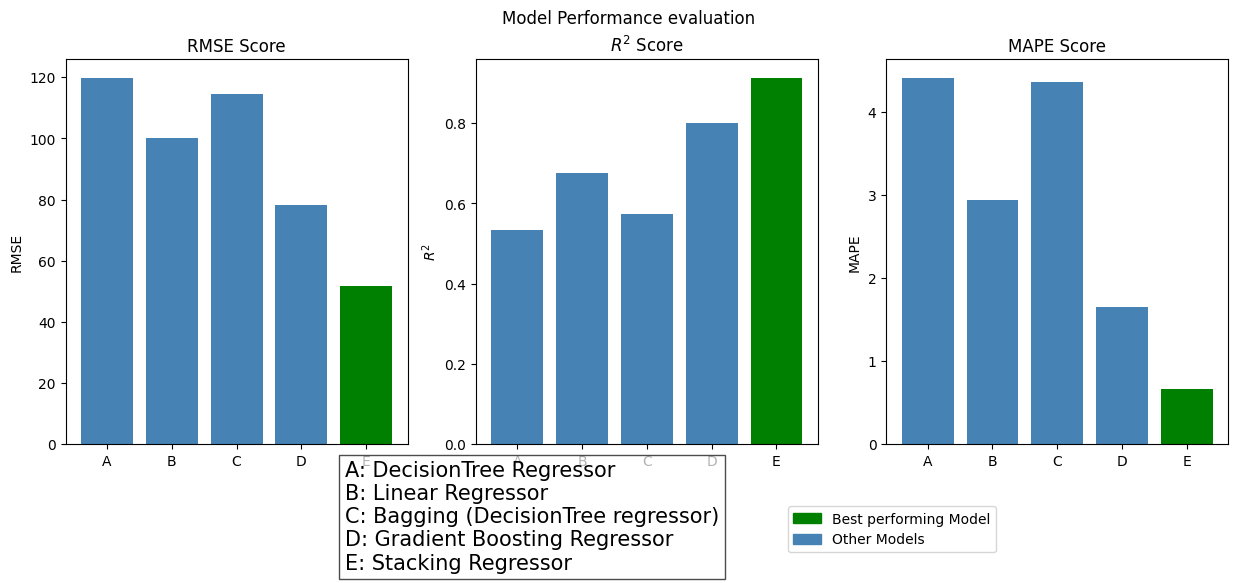

In [19]:
best_rmse = min(RMSE_score)
best_r2 = max(R2_score)
best_mape = min(MAPE_score)

rmse_colors = ['green' if v == best_rmse else 'steelblue' for v in RMSE_score]
r2_colors   = ['green' if v == best_r2 else 'steelblue' for v in R2_score]
mape_colors = ['green' if v == best_mape else 'steelblue' for v in MAPE_score]

legend_patches = [
    mpatches.Patch(color='green', label='Best performing Model'),
    mpatches.Patch(color='steelblue', label='Other Models')
]

fig,ax=plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Model Performance evaluation")

ax[0].bar(range(len(RMSE_score)),RMSE_score,color=rmse_colors)
ax[0].set_xticks(range(len(model_scores.keys())),["A","B","C","D","E"])
ax[0].set_ylabel("RMSE")
ax[0].set_title("RMSE Score")

ax[1].bar(range(len(R2_score)),R2_score,color=r2_colors)
ax[1].set_xticks(range(len(model_scores.keys())),["A","B","C","D","E"])
ax[1].set_ylabel("$R^2$")
ax[1].set_title("$R^2$ Score")

ax[2].bar(range(len(MAPE_score)),MAPE_score,color=mape_colors)
ax[2].set_xticks(range(len(model_scores.keys())),["A","B","C","D","E"])
ax[2].set_ylabel("MAPE")
ax[2].set_title("MAPE Score")

_=plt.text(-9, -1.5, "A: DecisionTree Regressor\nB: Linear Regressor "\
"\nC: Bagging (DecisionTree regressor)\nD: Gradient Boosting Regressor\nE: Stacking Regressor", fontsize=15,
         bbox=dict(facecolor="white", alpha=0.7))

fig.legend(handles=legend_patches, loc='lower right', ncol=1,bbox_to_anchor=(0.75,-0.12))



plt.savefig("./assests/model_eval.png",bbox_inches="tight")

####  $\textcolor{#42EFFF}{\text{Bias–Variance Trade-off}}$

The **bias–variance trade-off** explains how different models balance complexity and generalization.  
Each ensemble method **Bagging**, **Boosting**, and **Stacking** tackles a different side of this trade-off to improve prediction accuracy.


#### Baseline Models
- **Linear Regression** has **high bias** and **low variance**, assuming linear relationships and often underfitting complex non-linear trends.  
- **Decision Tree Regressor** has **low bias** but **high variance**, capturing non-linear patterns but overfitting easily.  
- These two baselines represent opposite ends of the bias–variance spectrum:  
  - Linear Regression → *Underfits (high bias)*  
  - Decision Tree → *Overfits (high variance)*


#### Bagging (Variance Reduction)
- **Bagging** reduces **variance** by training multiple **Decision Trees** on different bootstrapped subsets of the data and averaging their predictions.  
- This averaging smooths out random fluctuations, stabilizing predictions from inherently high-variance trees.  
- However, since Decision Trees already fit complex, non-linear relationships and the dataset here is relatively structured, Bagging’s variance reduction **did not significantly improve generalization**.  
- the **Linear Regression baseline slightly outperformed Bagging**, suggesting that variance was not the dominant issue the dataset’s relationships are largely linear, where tree ensembles add unnecessary complexity.


#### Gradient Boosting (Bias Reduction)
- **Gradient Boosting** focuses on **bias reduction** by sequentially training shallow trees that correct the residuals of previous models.  
- This process allows the ensemble to learn subtle, non-linear relationships that a single Linear Regression cannot capture.  
- The result is a **notable improvement in RMSE and R²**, confirming effective bias correction and more expressive modeling power compared to both Bagging and Linear Regression.


#### Stacking (Balancing Bias and Variance)
- **Stacking** combines multiple models — **KNN**, **Bagging (Decision Trees)**, and **Gradient Boosting** using a **Ridge Regression** meta-learner that learns how to optimally blend their predictions.  
- It leverages the **low bias** of Boosting, the **variance smoothing** of Bagging, and the **local adaptability** of KNN.  
- The meta-learner then balances these complementary behaviors, producing the **lowest RMSE** and **highest R²** among all models, demonstrating strong generalization.


#### Key Insight
- **Bagging** reduced variance but did not outperform Linear Regression because the dataset’s relationships are primarily linear.  
- **Boosting** reduced bias by iteratively refining predictions, achieving large performance gains.  
- **Stacking** intelligently combined diverse learners to capture both linear and non-linear dynamics achieving the best overall balance between bias and variance.


#### $\textcolor{#4FFF42}{\text{Final Model Performance Comparison}}$

| Model | RMSE ↓ | R² ↑ | MAPE ↓ |
|--------|--------|------|-------------|
| **Decision Tree Regressor** | 119.84 | 0.5329 | 4.4128 |
| **Linear Regressor** | 100.02 | 0.6747 | 2.9407 |
| **Bagging (Decision Tree)** | 114.52 | 0.5732 | 4.365 |
| **Gradient Boosting Regressor** | 78.39 | 0.8001 | 1.6557 |
| **Stacking Regressor** | **51.709** | **0.9130** | **0.6668** |

**Note:**  
- Models with **lower RMSE and MAPE** and **higher R²** perform better.  
- Although **Bagging** stabilized Decision Tree predictions, it did **not outperform the simpler Linear Regression baseline**, indicating that **bias**, not variance, was the limiting factor.  


<h3 style="color:orange">Conclusion</h3>

Based on all the model results, the **Stacking Regressor** emerged as the **best-performing model** .  
It achieved the **lowest RMSE**, **lowest MAPE**, and **highest R²**, outperforming the single Decision Tree and Linear Regression baselines, as well as other ensemble methods like Bagging and Gradient Boosting.

This superior performance can be explained through the **bias–variance trade-off** and the principle of **model diversity**:

- **Bias–Variance Optimization:**  
  - *Bagging reduces variance* by averaging multiple Decision Trees, leading to more stable predictions.  
  - *Boosting reduces bias* by sequentially correcting residuals, allowing the model to learn more complex patterns.  
  - Stacking, however, combines the strengths of both it learns an optimal blend of diverse models, achieving a balanced reduction of both bias and variance.

- **Model Diversity Advantage:**  
  The Stacking Regressor integrates predictions from **KNN (instance-based)**, **Bagging (variance-focused)**, and **Gradient Boosting (bias-focused)** learners.  
  The **meta-learner (Ridge Regression)** learns how to weight these predictions to minimize the overall generalization error.  
  This ensemble diversity allows Stacking to leverage complementary learning behaviors, improving robustness and adaptability to unseen data.

In short, **Stacking Regressor** delivers the best generalization performance by intelligently combining multiple learning paradigms. It also effectively captures complex relationships in the data while maintaining stability and avoiding overfitting demonstrating how **ensemble diversity and bias–variance balancing** lead to a powerful predictive model.
